In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline

In [2]:
pasos=pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/input/Paso_a_paso/paso_a_paso.csv?raw=true', sep=',')

In [6]:
pob=pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true', sep=',')
pob2=pob[['Region','Codigo region','Comuna','Codigo comuna','Poblacion']] 
pob2=pob2.dropna()

In [10]:
pob2.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion
0,Arica y Parinacota,15,Arica,15101.0,247552.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0
5,Tarapacá,1,Alto Hospicio,1107.0,129999.0


In [11]:
pob2['Poblacion']=pob2['Poblacion'].astype(int)
pob2['Codigo comuna']=pob2['Codigo comuna'].astype(int)

In [12]:
pasos.tail()

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06
381,12,Magallanes,12101,Punta Arenas,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,5
382,12,Magallanes,12103,Río Verde,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,5
383,12,Magallanes,12104,San Gregorio,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,5
384,12,Magallanes,12303,Timaukel,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,5
385,12,Magallanes,12402,Torres del Paine,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,5


In [13]:
pob2.tail() 

,Region,Codigo region,Comuna,Codigo comuna,Poblacion
356,Magallanes,12,Punta Arenas,12101,141984
357,Magallanes,12,Rio Verde,12103,211
358,Magallanes,12,San Gregorio,12104,681
359,Magallanes,12,Timaukel,12303,282
360,Magallanes,12,Torres del Paine,12402,1021


In [12]:
pasosm=pasos.melt(id_vars=["codigo_region","region_residencia","codigo_comuna","comuna_residencia","zona"], var_name="fecha", value_name="paso") 

In [14]:
pasosm1=pasosm[(pasosm['paso']==1)] 
pasosm1

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,fecha,paso
1,15,Arica y Parinacota,15101,Arica,Urbana,2020-07-28,1
5,1,Tarapacá,1107,Alto Hospicio,Total,2020-07-28,1
9,1,Tarapacá,1101,Iquique,Total,2020-07-28,1
12,1,Tarapacá,1401,Pozo Almonte,Urbana,2020-07-28,1
14,2,Antofagasta,2101,Antofagasta,Urbana,2020-07-28,1
15,2,Antofagasta,2201,Calama,Total,2020-07-28,1
18,2,Antofagasta,2102,Mejillones,Urbana,2020-07-28,1
24,2,Antofagasta,2301,Tocopilla,Urbana,2020-07-28,1
28,3,Atacama,3101,Copiapó,Total,2020-07-28,1
51,5,Valparaíso,5502,La Calera,Total,2020-07-28,1


In [15]:
pasosm1=pasosm1.rename(columns={'codigo_comuna':'Codigo comuna'})


In [16]:
paspob=pob2.merge(pasosm1, on='Codigo comuna') 
paspobr=pob2.merge(pasosm1, on='Codigo comuna')

In [19]:
paspob=paspob.sort_values(by='fecha', ascending=True)  
paspob

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,codigo_region,region_residencia,comuna_residencia,zona,fecha,paso
0,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Urbana,2020-07-28,1
9791,Metropolitana,13,Recoleta,13127,190075,13,Metropolitana,Recoleta,Total,2020-07-28,1
4801,Valparaíso,5,Vina del Mar,5109,361371,5,Valparaíso,Viña del Mar,Total,2020-07-28,1
9506,Metropolitana,13,Quilicura,13125,254694,13,Metropolitana,Quilicura,Total,2020-07-28,1
4986,Metropolitana,13,Buin,13402,109641,13,Metropolitana,Buin,Total,2020-07-28,1
9348,Metropolitana,13,Puente Alto,13201,645909,13,Metropolitana,Puente Alto,Total,2020-07-28,1
9909,Metropolitana,13,Renca,13128,160847,13,Metropolitana,Renca,Total,2020-07-28,1
9197,Metropolitana,13,Pudahuel,13124,253139,13,Metropolitana,Pudahuel,Total,2020-07-28,1
9134,Metropolitana,13,Providencia,13123,157749,13,Metropolitana,Providencia,Total,2020-07-28,1
266,Tarapacá,1,Alto Hospicio,1107,129999,1,Tarapacá,Alto Hospicio,Total,2020-07-28,1


In [20]:
paspob['fecha'] = pd.to_datetime(paspob['fecha'], format='%Y/%m/%d')
paspob['fecha'] = pd.to_datetime(paspob['fecha'], format='%Y-%m-%d').dt.strftime('%d-%m-%Y')
paspob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31212 entries, 0 to 26846
Data columns (total 11 columns):
Region               31212 non-null object
Codigo region        31212 non-null int64
Comuna               31212 non-null object
Codigo comuna        31212 non-null int32
Poblacion            31212 non-null int32
codigo_region        31212 non-null int64
region_residencia    31212 non-null object
comuna_residencia    31212 non-null object
zona                 31212 non-null object
fecha                31212 non-null object
paso                 31212 non-null int64
dtypes: int32(2), int64(3), object(6)
memory usage: 2.6+ MB


In [21]:
paspob.drop('paso', axis=1, inplace=True)
paspob.drop('Comuna', axis=1, inplace=True)
paspob.drop('Codigo comuna', axis=1, inplace=True)
paspob.drop('codigo_region', axis=1, inplace=True)
paspob.drop('Codigo region', axis=1, inplace=True)



In [22]:
paspob.groupby(['fecha']).sum() 


,Poblacion
fecha,
01-01-2021,996425
01-02-2021,6005155
01-03-2021,1673901
01-04-2021,17900965
01-05-2021,15292453
01-06-2021,7061797
01-07-2021,4142939
01-08-2020,10609230
01-08-2021,108584


In [23]:
paspobr1=paspobr[(paspobr['codigo_region']==1)]
paspobr2=paspobr[(paspobr['codigo_region']==2)]
paspobr3=paspobr[(paspobr['codigo_region']==3)]
paspobr4=paspobr[(paspobr['codigo_region']==4)]
paspobr5=paspobr[(paspobr['codigo_region']==5)]
paspobr6=paspobr[(paspobr['codigo_region']==6)]
paspobr7=paspobr[(paspobr['codigo_region']==7)]
paspobr8=paspobr[(paspobr['codigo_region']==8)]
paspobr9=paspobr[(paspobr['codigo_region']==9)]
paspobr10=paspobr[(paspobr['codigo_region']==10)]
paspobr11=paspobr[(paspobr['codigo_region']==11)]
paspobr12=paspobr[(paspobr['codigo_region']==12)]
paspobr13=paspobr[(paspobr['codigo_region']==13)]
paspobr14=paspobr[(paspobr['codigo_region']==14)]
paspobr15=paspobr[(paspobr['codigo_region']==15)]
paspobr16=paspobr[(paspobr['codigo_region']==16)]


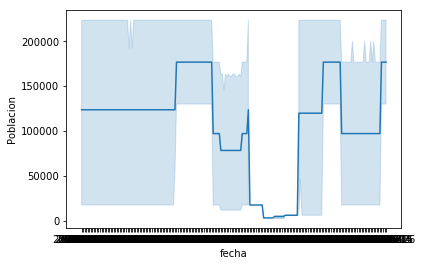

In [27]:
sns.lineplot(x='fecha', y='Poblacion', data=paspobr1)

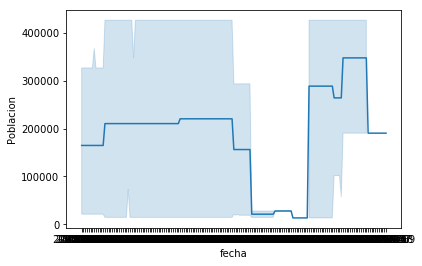

In [28]:
sns.lineplot(x='fecha', y='Poblacion', data=paspobr2)

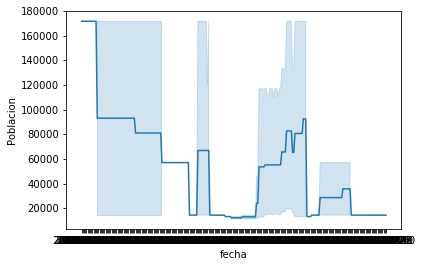

In [29]:
sns.lineplot(x='fecha', y='Poblacion', data=paspobr3)

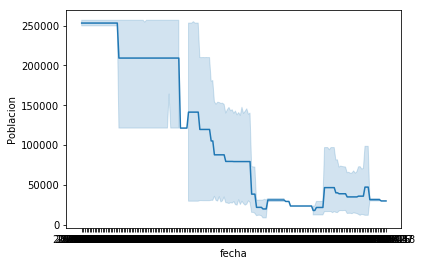

In [30]:
sns.lineplot(x='fecha', y='Poblacion', data=paspobr4)

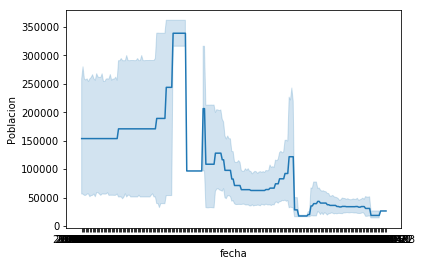

In [31]:
sns.lineplot(x='fecha', y='Poblacion', data=paspobr5)

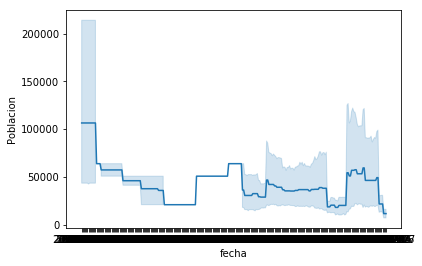

In [32]:
sns.lineplot(x='fecha', y='Poblacion', data=paspobr6)

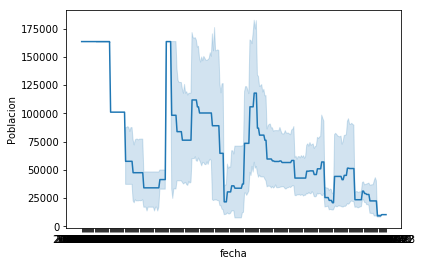

In [33]:
sns.lineplot(x='fecha', y='Poblacion', data=paspobr7)

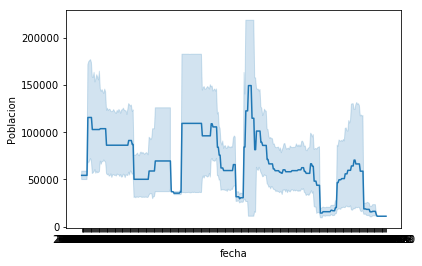

In [34]:
sns.lineplot(x='fecha', y='Poblacion', data=paspobr8)

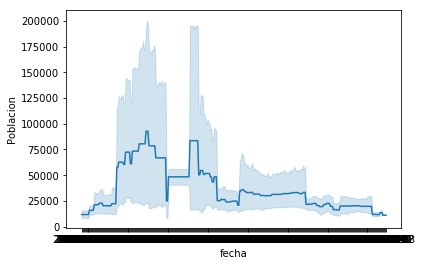

In [35]:
sns.lineplot(x='fecha', y='Poblacion', data=paspobr9)

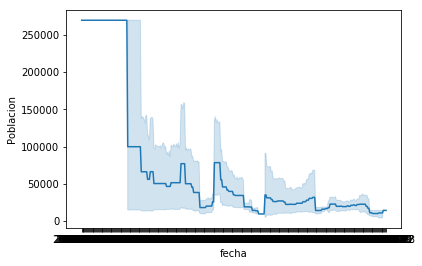

In [36]:
sns.lineplot(x='fecha', y='Poblacion', data=paspobr10)

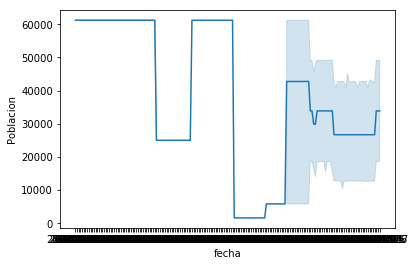

In [37]:
sns.lineplot(x='fecha', y='Poblacion', data=paspobr11)

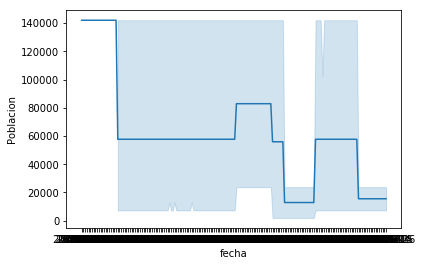

In [38]:
sns.lineplot(x='fecha', y='Poblacion', data=paspobr12)

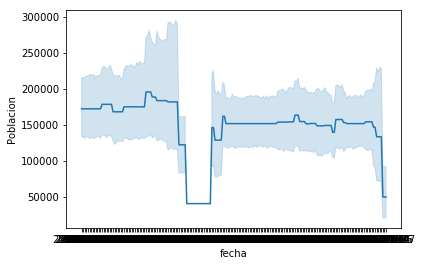

In [39]:
sns.lineplot(x='fecha', y='Poblacion', data=paspobr13)

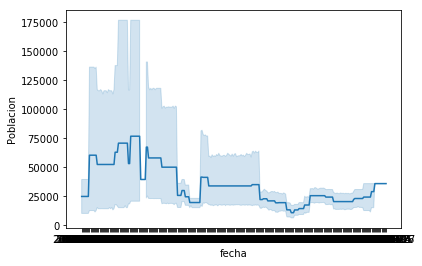

In [40]:
sns.lineplot(x='fecha', y='Poblacion', data=paspobr14)

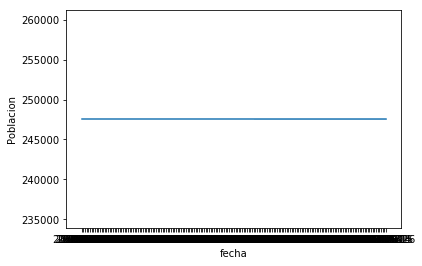

In [24]:
sns.lineplot(x='fecha', y='Poblacion', data=paspobr15)

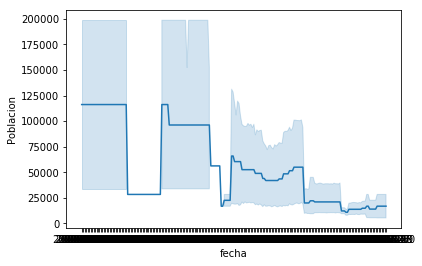

In [42]:
sns.lineplot(x='fecha', y='Poblacion', data=paspobr16)